# Korean Pop Music

In [894]:
import matplotlib.pyplot as plt
import mplcyberpunk
import numpy
import pandas

plt.style.use('cyberpunk')

In [895]:
DATE_OF_BIRTH_COLUMN = "date_of_birth"
DEBUT_COLUMN = "debut"
BIRTH_YEAR_COLUMN = "birth_year"
DEBUT_YEAR_COLUMN = "debut_year"
NUMBER_OF_IDOLS_LABEL = "Number of Idols"

In [896]:
idols_data_frame = pandas.read_csv("./idols.csv")
idols_data_frame.columns = map(lambda item: "_".join(item.lower().split(" ")), idols_data_frame.columns)
idols_data_frame[[DEBUT_COLUMN, DATE_OF_BIRTH_COLUMN]] = idols_data_frame[[DEBUT_COLUMN, DATE_OF_BIRTH_COLUMN]].apply(pandas.to_datetime, dayfirst=True)
idols_data_frame[BIRTH_YEAR_COLUMN] = pandas.DatetimeIndex(idols_data_frame[DATE_OF_BIRTH_COLUMN]).year
idols_data_frame[DEBUT_YEAR_COLUMN] = pandas.DatetimeIndex(idols_data_frame[DEBUT_COLUMN]).year
idols_data_frame["debut_age"] = (idols_data_frame[DEBUT_YEAR_COLUMN] - idols_data_frame[BIRTH_YEAR_COLUMN])
idols_data_frame = idols_data_frame.sort_values(by=["company", "group", "stage_name"], ignore_index=True)
idols_data_frame.to_csv("./transformed/idols.csv", index_label="id", header=True, na_rep="N/A")
idols_data_frame

,stage_name,full_name,korean_name,k_stage_name,date_of_birth,group,debut,company,country,second_country,height,weight,birthplace,other_group,former_group,gender,birth_year,debut_year,debut_age
0,Gaeun,Oh Gaeun,오가은,가은,2005-11-08,LIMELIGHT,2023-02-17,143,South Korea,NaN,165.0,NaN,NaN,NaN,NaN,F,2005.0,2023.0,18.0
1,MiU,Ito Miyu,이토 미유,미유,2003-01-09,LIMELIGHT,2023-02-17,143,Japan,NaN,164.0,42.0,Tokyo,NaN,NaN,F,2003.0,2023.0,20.0
2,Suhye,Kim Suhye,김수혜,수혜,2004-12-13,LIMELIGHT,2023-02-17,143,South Korea,NaN,158.0,40.0,Incheon,NaN,NaN,F,2004.0,2023.0,19.0
3,Ace,Jang Wooyoung,장우영,에이스,1992-08-28,VAV,2015-10-31,A team,South Korea,NaN,177.0,63.0,NaN,NaN,NaN,M,1992.0,2015.0,23.0
4,Ayno,Noh Yoonho,노윤호,에이노,1996-05-01,VAV,2015-10-31,A team,South Korea,NaN,183.0,61.0,NaN,NaN,NaN,M,1996.0,2015.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,Youngmin,Lim Youngmin,임영민,영민,1995-12-25,NaN,NaT,NaN,South Korea,NaN,NaN,NaN,Busan,MXM,AB6IX,M,1995.0,NaN,NaN
1774,Yubin,Cho Yubin,조유빈,유빈,1999-10-09,NaN,NaT,NaN,South Korea,NaN,156.0,40.0,NaN,NaN,Pink Fantasy,F,1999.0,NaN,NaN
1775,Yujeong,Kim Yujeong,김유정,유정,1992-02-14,NaN,NaT,NaN,South Korea,NaN,161.0,42.0,Seoul,NaN,LABOUM,F,1992.0,NaN,NaN
1776,Yulhee,Kim Yulhee,김율희,율희,1997-11-27,NaN,NaT,NaN,South Korea,NaN,166.0,52.0,Bucheon,NaN,LABOUM,F,1997.0,NaN,NaN


## Groups

### Number of Groups

In [897]:
groups = idols_data_frame["group"].unique().tolist()
groups = list(map(lambda item: str(item), groups))
groups.sort()
groups_txt = open("groups.txt", "w+")
groups_txt.write("\n".join(groups))
len(groups)

288

## Companies

### Number of Companies

In [898]:
companies = idols_data_frame["company"].unique().tolist()
companies = list(map(lambda item: str(item), companies))
companies.sort()
companies_txt = open("companies.txt", "w+")
companies_txt.write("\n".join(companies))
len(companies)

180

### Number of Idols by Companies

In [899]:
companies_series = idols_data_frame['company'].value_counts()
companies_series

company
SM          66
JYP         56
FNC         52
Starship    44
YG          41
            ..
ARA-LINE     2
AO           2
Rolling      2
Midas        1
Hunus        1
Name: count, Length: 179, dtype: int64

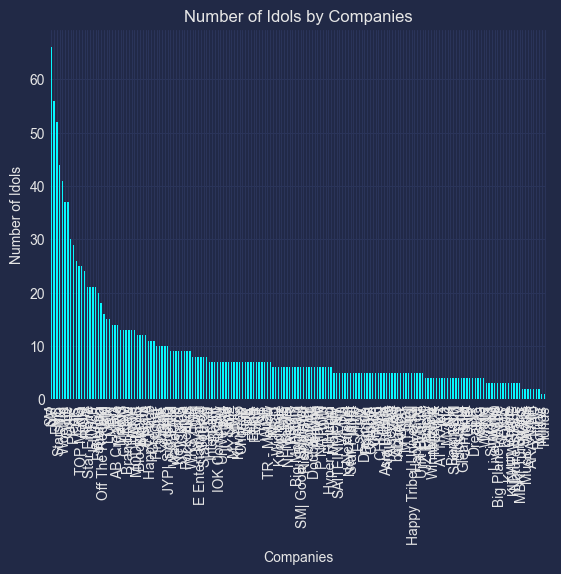

In [900]:
companies_series.plot.bar()
plt.title('Number of Idols by Companies')
plt.xlabel('Companies')
plt.ylabel(NUMBER_OF_IDOLS_LABEL)
plt.show()

## Countries

### Number of Countries

In [901]:
countries = idols_data_frame["country"].unique().tolist()
countries = list(map(lambda item: str(item), countries))
countries.sort()
countries_txt = open("countries.txt", "w+")
countries_txt.write("\n".join(countries))
len(countries)

20

### Idols by Countries

In [902]:
countries_series = idols_data_frame['country'].value_counts()
countries_series

country
South Korea    1599
Japan            64
China            46
USA              18
Thailand         13
Taiwan            9
Canada            6
Hong Kong         5
Australia         4
Vietnam           2
Indonesia         2
Philippines       2
Macau             1
Malaysia          1
New Zealand       1
Belgium           1
Russia            1
India             1
Brazil            1
Germany           1
Name: count, dtype: int64

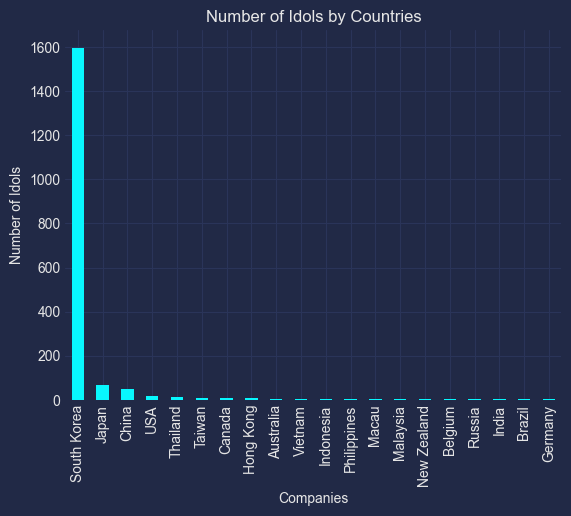

In [903]:
countries_series.plot.bar()
plt.title('Number of Idols by Countries')
plt.xlabel('Companies')
plt.ylabel(NUMBER_OF_IDOLS_LABEL)
plt.show()

## Years

### Years of Birth

In [904]:
birth_years_series = idols_data_frame[BIRTH_YEAR_COLUMN].value_counts()
birth_years_series = birth_years_series.sort_index()
birth_years_series

birth_year
1977.0      1
1979.0      4
1980.0      2
1981.0      4
1982.0      1
1983.0      3
1984.0      4
1985.0      4
1986.0     14
1987.0     16
1988.0     27
1989.0     38
1990.0     59
1991.0     73
1992.0     75
1993.0     84
1994.0    113
1995.0    119
1996.0    126
1997.0    119
1998.0    120
1999.0    139
2000.0    169
2001.0    133
2002.0    111
2003.0     75
2004.0     75
2005.0     42
2006.0     11
2007.0      8
2008.0      6
2009.0      1
Name: count, dtype: int64

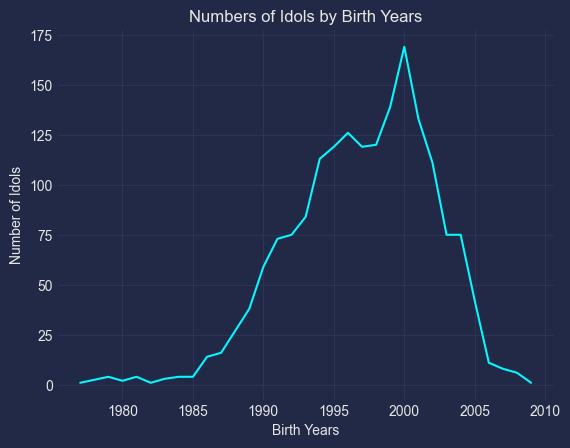

In [905]:
birth_years_series.plot.line()
plt.title('Numbers of Idols by Birth Years')
plt.xlabel('Birth Years')
plt.ylabel(NUMBER_OF_IDOLS_LABEL)
plt.show()

### Years of Debut

In [906]:
debut_years_series = idols_data_frame[DEBUT_YEAR_COLUMN].value_counts()
debut_years_series = debut_years_series.sort_index()
debut_years_series

debut_year
1998.0      6
2003.0      2
2005.0     12
2006.0      8
2007.0     23
2008.0     18
2009.0     40
2010.0     47
2011.0     40
2012.0     98
2013.0     41
2014.0     91
2015.0    100
2016.0    114
2017.0    169
2018.0    116
2019.0    156
2020.0    200
2021.0    121
2022.0    183
2023.0     40
Name: count, dtype: int64

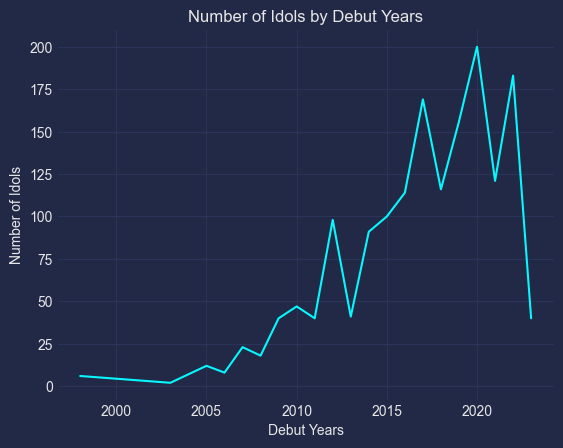

In [907]:
debut_years_series.plot.line()
plt.title('Number of Idols by Debut Years')
plt.xlabel('Debut Years')
plt.ylabel(NUMBER_OF_IDOLS_LABEL)
plt.show()

### Debut Age

In [908]:
debut_age_series = idols_data_frame['debut_age'].value_counts()
debut_age_series = debut_age_series.sort_index()
debut_age_series

debut_age
10.0      1
11.0      2
13.0      6
14.0     16
15.0     46
16.0    113
17.0    169
18.0    233
19.0    258
20.0    234
21.0    183
22.0    140
23.0     90
24.0     59
25.0     39
26.0     17
27.0      4
28.0      2
29.0      4
30.0      2
31.0      1
32.0      2
33.0      2
Name: count, dtype: int64

## Genders

In [909]:
gender_series = idols_data_frame['gender'].value_counts()
gender_series

gender
F    889
M    889
Name: count, dtype: int64

## Name

In [910]:
stage_name_series = idols_data_frame['stage_name'].value_counts()
stage_name_series

stage_name
Yubin     7
Woojin    5
Minjae    5
Kevin     5
Yuna      4
         ..
Ryujei    1
Roshin    1
Rihan     1
Raots     1
Z-UK      1
Name: count, Length: 1469, dtype: int64

In [911]:
birth_name_series = idols_data_frame['korean_name'].value_counts()
birth_name_series

korean_name
김지원    4
김동현    4
김민지    4
이승현    4
박지원    4
      ..
배현준    1
이유경    1
양연제    1
민가린    1
정재욱    1
Name: count, Length: 1654, dtype: int64